In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import InputLayer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

import pandas as pd

## Import the data

In [26]:
df = pd.read_csv('data.csv')

X = df.drop(columns = ['0']).copy()
y = df['0']

integer_encoded = LabelEncoder().fit_transform(y)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
y_onehot = OneHotEncoder(sparse=False).fit_transform(integer_encoded)


# Split data into testing, training and validation data
X_train, X_rem, y_train, y_rem = train_test_split(X, y_onehot, train_size=0.8)
X_val, X_test, y_val, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

classes = ['a', 'b', 'c', 'd', 'e', 'f', 'g']
num_classes = len(classes)
num_features = len(X.columns)

## Define and compile the model

In [43]:
model = Sequential()
model.add(InputLayer(input_shape=(num_features,)))
model.add(Dense(20, activation= 'relu' ))
model.add(Dropout(0.2))
model.add(Dense(10, activation= 'relu' ))
model.add(Dropout(0.2))
model.add(Dense(10, activation= 'relu' ))
model.add(Dense(num_classes, activation= 'softmax' ))
model.compile(loss= 'categorical_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy'])

## Fit the model to our data

In [45]:
history = model.fit(X_train, y_train,
          validation_data=(X_val, y_val),
          epochs=10,
          batch_size= 10)
score = model.evaluate(X_test, y_test, batch_size=10)
print("Test accuracy: ", score[1])

Epoch 1/10
1227/1227 [==============================] - 3s 3ms/step - loss: 0.4969 - accuracy: 0.8123 - val_loss: 0.2501 - val_accuracy: 0.9432
Epoch 2/10
1227/1227 [==============================] - 3s 2ms/step - loss: 0.4232 - accuracy: 0.8458 - val_loss: 0.2059 - val_accuracy: 0.9517
Epoch 3/10
1227/1227 [==============================] - 2s 2ms/step - loss: 0.3948 - accuracy: 0.8599 - val_loss: 0.1744 - val_accuracy: 0.9609
Epoch 4/10
1227/1227 [==============================] - 3s 2ms/step - loss: 0.3577 - accuracy: 0.8787 - val_loss: 0.1484 - val_accuracy: 0.9641
Epoch 5/10
1227/1227 [==============================] - 3s 2ms/step - loss: 0.3280 - accuracy: 0.8853 - val_loss: 0.1107 - val_accuracy: 0.9693
Epoch 6/10
1227/1227 [==============================] - 2s 2ms/step - loss: 0.2957 - accuracy: 0.9000 - val_loss: 0.0913 - val_accuracy: 0.9791
Epoch 7/10
1227/1227 [==============================] - 3s 2ms/step - loss: 0.2886 - accuracy: 0.9000 - val_loss: 0.0881 - val_accuracy:

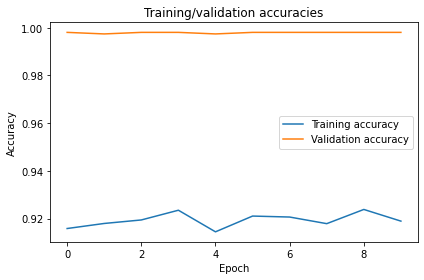

In [40]:
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training/validation accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.tight_layout()
plt.legend(loc="right")

In [46]:
model.save("model")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: model\assets
